In [1]:
import numpy as np
import pylab as plt
import os
plt.rcParams['figure.figsize'] = (10, 6)
os.environ["pRT_input_data_path"] = "/Applications/ownpy/petitRADTRANS/petitRADTRANS/input_data"
import nat_cst as nc

In [2]:
from petitRADTRANS import Radtrans

In [3]:
struct = np.genfromtxt('../res_files/res_struct.dat')
ab_struct = nc.read_abunds('../res_files/final_abund_all.dat')

In [4]:
rt_object = Radtrans(line_species = ['CH4_R_10',
                                    'H2O_R_10',
                                    'CO2_R_10',
                                    'H2_R_10',
                                    'H2S_R_10',
                                    'NH3_R_10',
                                    'PH3_R_10',
                                    'Na_R_10',
                                    'K_R_10',
                                    'CO_all_iso_R_10',
                                    'HCN_R_10'],
                    rayleigh_species = ['H2', 'He'], \
                    continuum_opacities= ['H2-H2', 'H2-He'], \
                    wlen_bords_micron=[0.11,250],
                    do_scat_emis=True)

  Read line opacities of CH4_R_10...
 Done.
  Read line opacities of H2O_R_10...
 Done.
  Read line opacities of CO2_R_10...
 Done.
  Read line opacities of H2_R_10...
 Done.
  Read line opacities of H2S_R_10...
 Done.
  Read line opacities of NH3_R_10...
 Done.
  Read line opacities of PH3_R_10...
 Done.
  Read line opacities of Na_R_10...
 Done.
  Read line opacities of K_R_10...
 Done.
  Read line opacities of CO_all_iso_R_10...
 Done.
  Read line opacities of HCN_R_10...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [5]:
rt_object.setup_opa_structure(ab_struct['P'])

In [6]:
gravity = 1e1**3.5

mass_fractions = {}
for spec in rt_object.line_species:
    mass_fractions[spec] = ab_struct['m'+spec.split('_')[0]]
    
mass_fractions['He'] = ab_struct['mHe']
mass_fractions['H2'] = ab_struct['mH2']
MMW = struct[:,-2]

In [7]:
%time rt_object.PT_it(ab_struct['T'], \
                      mass_fractions, \
                      gravity, \
                      MMW, \
                      Tstar = 5300., \
                      Rstar = nc.r_sun, \
                      geometry = 'planetary_ave', \
                      semimajoraxis = 0.045345163572251344*nc.AU)

Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
CPU times: user 2.07 s, sys: 74.4 ms, total: 2.15 s
Wall time: 2.14 s


In [8]:
spectrum = np.genfromtxt('../res_files/flux_r10.dat')

(0.0, 2e-06)

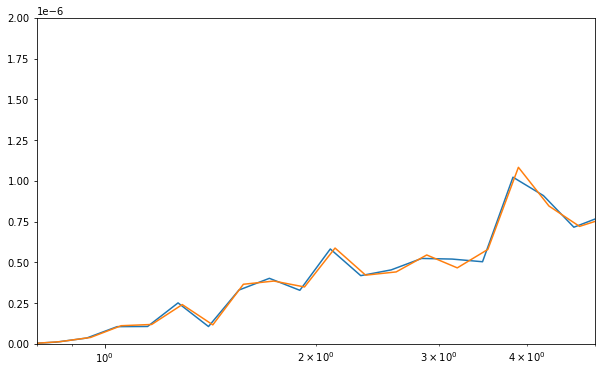

In [9]:
plt.plot(spectrum[:,0]/1e-4,spectrum[:,1])
plt.plot(nc.c/rt_object.freq/1e-4, rt_object.flux)
plt.xscale('log')
#plt.yscale('log')
plt.xlim([0.8,5])
plt.ylim([0,2e-6])
#plt.xlim([0.11,250])

(0.11, 250)

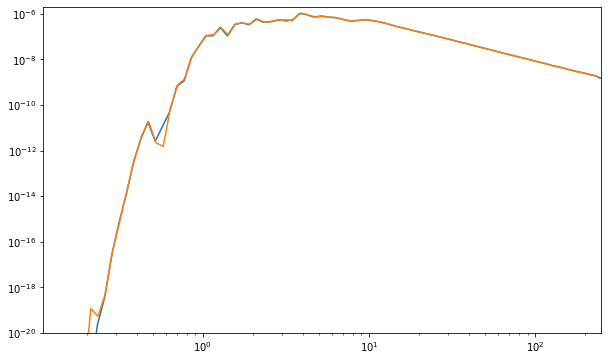

In [10]:
plt.plot(spectrum[:,0]/1e-4,spectrum[:,1])
plt.plot(nc.c/rt_object.freq/1e-4, rt_object.flux)
plt.xscale('log')
plt.yscale('log')
#plt.xlim([0.8,5])
plt.ylim([1e-20,2e-6])
plt.xlim([0.11,250])

Text(0.5, 1.0, 'kappa_P')

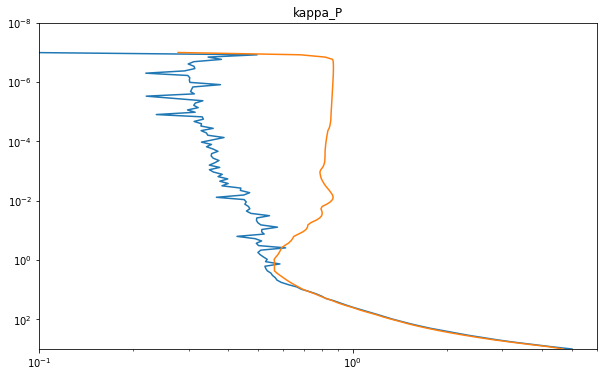

In [11]:
plt.yscale('log')
plt.xscale('log')
plt.plot(rt_object.kappa_planck, rt_object.press/1e6)
#dat = np.genfromtxt('../read_in_python.dat')
dat = np.genfromtxt('../res_files/res_struct.dat')
#plt.plot(dat[:,8], dat[:,0]/1e6)
plt.plot(dat[:,6], dat[:,0])
plt.ylim([1e3,1e-8])
plt.xlim([1e-1,6])
plt.title('kappa_P')

(1e-06, 1.0)

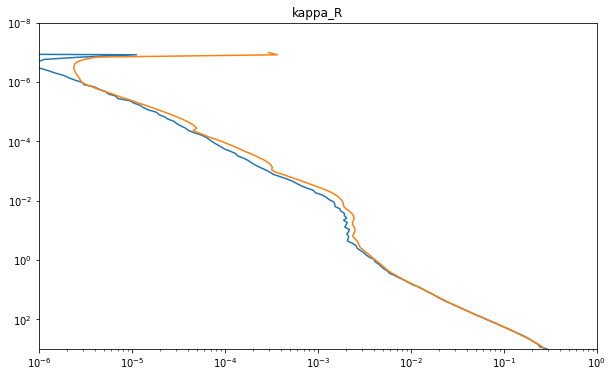

In [12]:
plt.yscale('log')
plt.xscale('log')
plt.plot(rt_object.kappa_rosseland, rt_object.press/1e6)
#dat = np.genfromtxt('../read_in_python.dat')
dat = np.genfromtxt('../res_files/res_struct.dat')
#plt.plot(dat[:,8], dat[:,0]/1e6)
plt.plot(dat[:,4], dat[:,0])
plt.ylim([1e3,1e-8])
plt.title('kappa_R')
plt.xlim([1e-6,1e0])

Text(0.5, 1.0, 'J_bol')

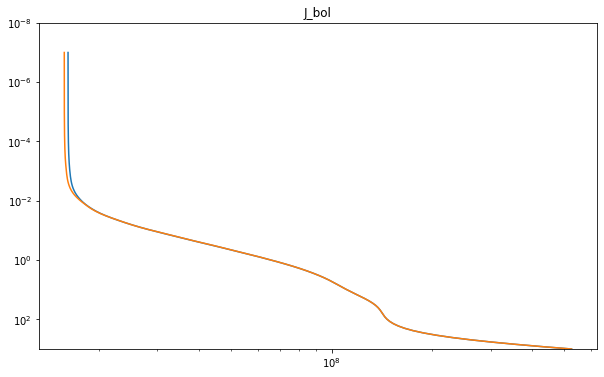

In [13]:
# Read from pC
dat_pC = np.genfromtxt('../read_in_python.dat')
press = dat_pC[:,0]
kappa_H = dat_pC[:,2]
kappa_J = dat_pC[:,3]
eddington_F = dat_pC[:,4]
eddington_Psi = dat_pC[0,5]
abs_S = dat_pC[:,6]
gammas = dat_pC[:,7]
kappa_P = dat_pC[:,8]
J_bol = dat_pC[:,9]


plt.yscale('log')
plt.xscale('log')
plt.plot(rt_object.J_bol, rt_object.press/1e6)
plt.plot(J_bol, press*1e-6)
plt.ylim([1e3,1e-8])
plt.title('J_bol')
#plt.xlim([1e-6,1e0])

Text(0.5, 1.0, 'eddington_F')

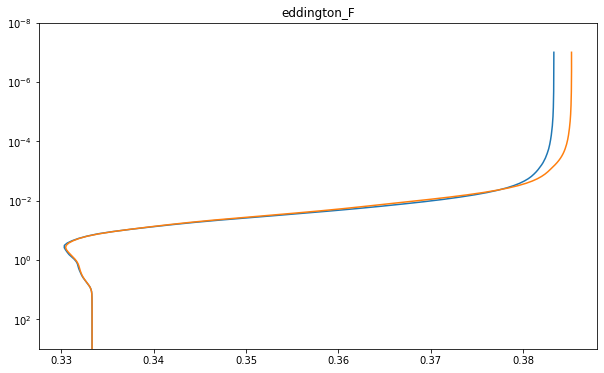

In [14]:
plt.yscale('log')
#plt.xscale('log')
plt.plot(rt_object.eddington_F, rt_object.press/1e6)
plt.plot(eddington_F, press*1e-6)
plt.ylim([1e3,1e-8])
plt.title('eddington_F')

In [15]:
print(rt_object.eddington_Psi, eddington_Psi, (rt_object.eddington_Psi-eddington_Psi)/eddington_Psi)

-0.5531222267763513 -0.5559747914719526 -0.005130744665687348


Text(0.5, 1.0, 'kappa_J')

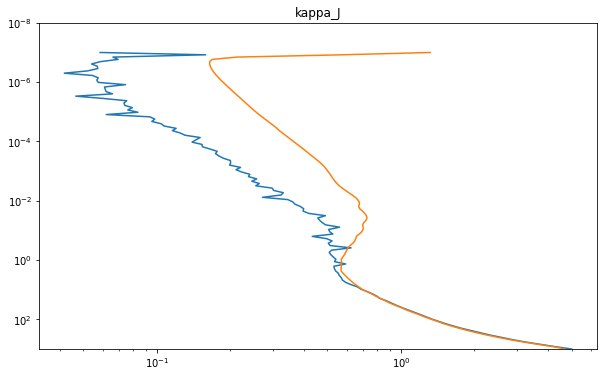

In [16]:
plt.yscale('log')
plt.xscale('log')
plt.plot(rt_object.kappa_J, rt_object.press/1e6)
plt.plot(kappa_J, press/1e6)
plt.ylim([1e3,1e-8])
plt.title('kappa_J')
#plt.xlim([1e-6,1e0])

Text(0.5, 1.0, 'kappa_H')

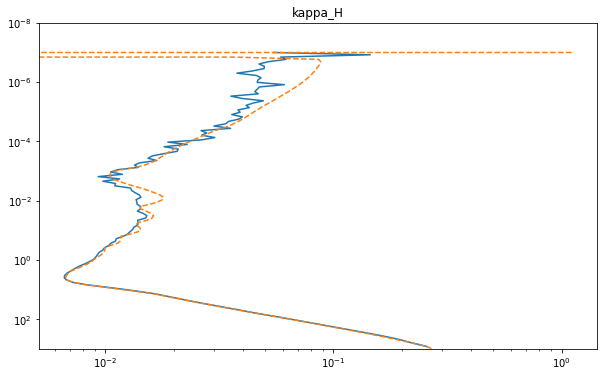

In [17]:
plt.yscale('log')
plt.xscale('log')
plt.plot(rt_object.kappa_H, rt_object.press/1e6)
plt.plot(kappa_H, press/1e6, '--')
plt.ylim([1e3,1e-8])
plt.title('kappa_H')
#plt.xlim([1e-6,1e0])

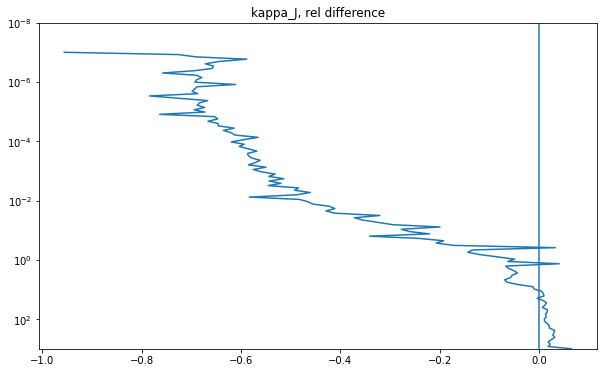

In [18]:
plt.yscale('log')
#plt.xscale('log')
plt.plot((rt_object.kappa_J-kappa_J)/kappa_J, rt_object.press/1e6)
plt.ylim([1e3,1e-8])
plt.title('kappa_J, rel difference')
plt.axvline(0)
#plt.xlim([1e-6,1e0])

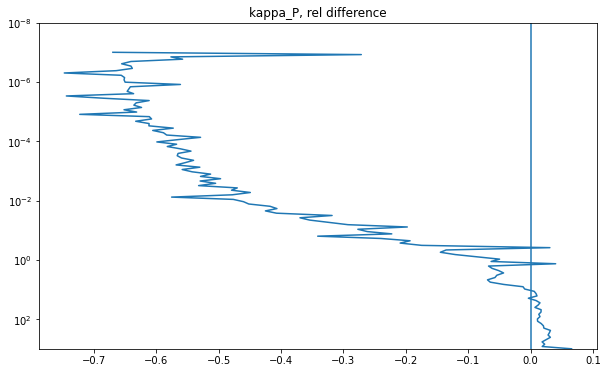

In [19]:
plt.yscale('log')
#plt.xscale('log')
plt.plot((rt_object.kappa_planck-kappa_P)/kappa_P, rt_object.press/1e6)
plt.ylim([1e3,1e-8])
plt.title('kappa_P, rel difference')
plt.axvline(0)
#plt.xlim([1e-6,1e0])

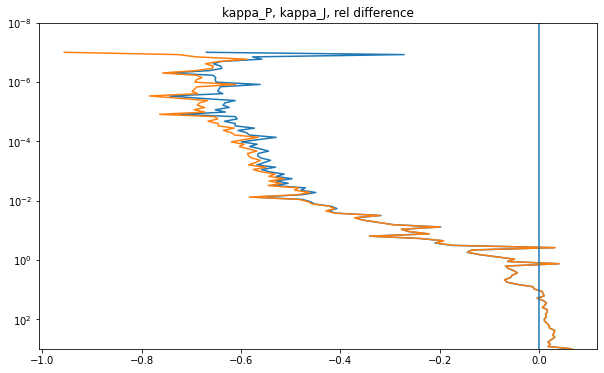

In [20]:
plt.yscale('log')
#plt.xscale('log')
plt.plot((rt_object.kappa_planck-kappa_P)/kappa_P, rt_object.press/1e6)
plt.plot((rt_object.kappa_J-kappa_J)/kappa_J, rt_object.press/1e6)
plt.ylim([1e3,1e-8])
plt.title('kappa_P, kappa_J, rel difference')
plt.axvline(0)
#plt.xlim([1e-6,1e0])

(0.2, 10)

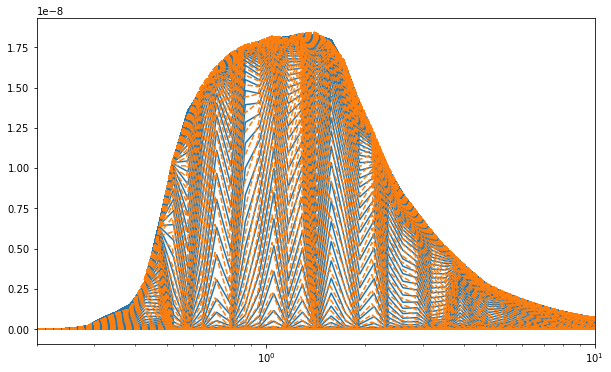

In [21]:
Hstar = np.genfromtxt('../Hstar.dat')
fluxr10 = np.genfromtxt('../res_files/flux_r10.dat')
#rt_object.H_star.shape
plt.xscale('log')
for i in range(len(rt_object.press)):
    plt.plot(nc.c/rt_object.freq/1e-4, -rt_object.H_star[:,i], color = 'C0')
for i in range(len(rt_object.press)):
    plt.plot(fluxr10[:,0]/1e-4, -Hstar[:,i], color = 'C1', linestyle = '--')
    
plt.xlim([0.2,10])

pRT stellar flux four times larger at the moment.... Continous adding due to scattering convergence loop somewhere? Otherwise compare what gets send into Feautrier!

In [22]:
# compare with expected values:
intval = np.sum((rt_object.H_star[1:,0] + \
                  rt_object.H_star[:-1,0]) * \
                 np.diff(rt_object.freq)) \
                 *4.*np.pi/2./nc.sigma/nc.r_sun**2.* \
                 (0.045345163572251344*nc.AU)**2. * 4

print(intval**0.25)

5217.222387363914


In [23]:
# compare with expected values:
intval = np.sum(-(rt_object.H_star_0[1:] + \
                  rt_object.H_star_0[:-1]) * \
                 np.diff(rt_object.freq)) \
                 *4.*np.pi/2./nc.sigma/nc.r_sun**2.* \
                 (0.045345163572251344*nc.AU)**2. * 4

print(intval**0.25)

5305.792071523125


(0.001, 10000000.0)

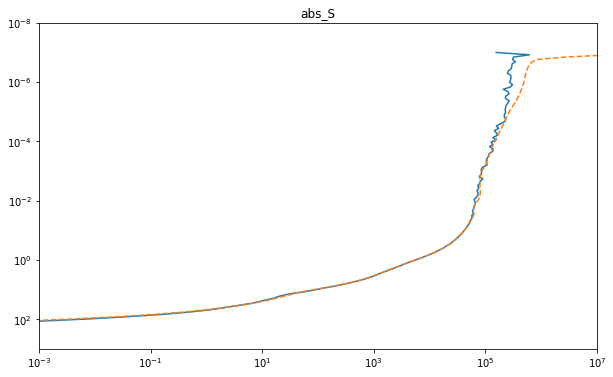

In [24]:
plt.yscale('log')
plt.xscale('log')
plt.plot(rt_object.abs_S, rt_object.press/1e6)
plt.plot(abs_S, press/1e6, '--')
plt.ylim([1e3,1e-8])
plt.title('abs_S')
plt.xlim([1e-3,1e7])

## First temp iter test

In [25]:
from temp_iter import temp_iter

# Physical parameters:
T_int = 150.

# Initial condition
#temp = ab_struct['T'] #np.ones_like(press)*1000.
temp = np.ones_like(press)*1000.

# Run setup
do_conv = False
convergence_test = True
convective = np.zeros_like(press) > 1.
start_conv = False
eddington_approx = False
# This is with the new mean_last = False treatment.
# Meaning 30 % of old 70 % of new solution.
# Old treatment was 90 % of old, 10 % of new
mean_last = False

In [26]:
rt_object.PT_it(temp, \
                      mass_fractions, \
                      gravity, \
                      MMW, \
                      Tstar = 5300., \
                      Rstar = nc.r_sun, \
                      geometry = 'planetary_ave', \
                      semimajoraxis = 0.045345163572251344*nc.AU)

Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!


In [27]:
list = [press, # n
                         temp,
                         T_int,
                         gravity,
                         rt_object.kappa_H, # n
                         rt_object.kappa_J, # n
                         rt_object.eddington_F, # n
                         rt_object.eddington_Psi, # n
                         rt_object.H_star, # n
                         rt_object.abs_S, # n
                         gammas, # n
                         do_conv,
                         rt_object.kappa_planck, # n
                         rt_object.J_bol, # n
                         convective,
                         convergence_test,
                         start_conv,
                         eddington_approx,
                         mean_last,
                         rt_object.border_freqs]

for l in list:
    print(l)

[1.00000000e-01 1.19541687e-01 1.42902149e-01 1.70827639e-01
 2.04210242e-01 2.44116368e-01 2.91820824e-01 3.48847535e-01
 4.17018228e-01 4.98510624e-01 5.95928010e-01 7.12382395e-01
 8.51593932e-01 1.01800975e+00 1.21694603e+00 1.45475781e+00
 1.73904203e+00 2.07888017e+00 2.48512843e+00 2.97076444e+00
 3.55130193e+00 4.24528623e+00 5.07488677e+00 6.06660525e+00
 7.25212225e+00 8.66930927e+00 1.03634385e+01 1.23886292e+01
 1.48095764e+01 1.77036174e+01 2.11632029e+01 2.52988497e+01
 3.02426717e+01 3.61525999e+01 4.32174278e+01 5.16628422e+01
 6.17586330e+01 7.38273116e+01 8.82544137e+01 1.05500815e+02
 1.26117454e+02 1.50762932e+02 1.80224552e+02 2.15443469e+02
 2.57544757e+02 3.07873347e+02 3.68036992e+02 4.39957629e+02
 5.25932771e+02 6.28708906e+02 7.51569232e+02 8.98438537e+02
 1.07400858e+03 1.28388798e+03 1.53478134e+03 1.83470351e+03
 2.19323552e+03 2.62183074e+03 3.13418069e+03 3.74665247e+03
 4.47881156e+03 5.35404689e+03 6.40031797e+03 7.65104806e+03
 9.14619192e+03 1.093351

0
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
1
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
2
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
3
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
4
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
5
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
6
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
7
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
8
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
9
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
10
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
11
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
12
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
13
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
14
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
15
Using Rstar value input by user.
SPEC STAR!
SPEC PLANET!
16
Using Rstar value input by user.
SPEC STAR!
SPE

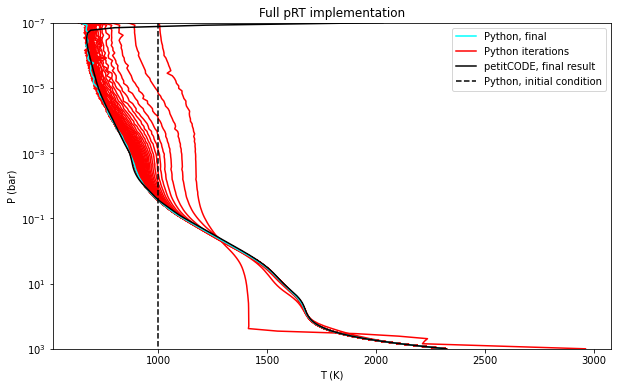

In [28]:
for i_iter in range(100):

    print(i_iter)
    rt_object.PT_it(temp, \
                      mass_fractions, \
                      gravity, \
                      MMW, \
                      Tstar = 5300., \
                      Rstar = nc.r_sun, \
                      geometry = 'planetary_ave', \
                      semimajoraxis = 0.045345163572251344*nc.AU)
    
    #print(press)
    
    kappa_H_take = rt_object.kappa_H
    kappa_H_take[-1] = kappa_H_take[-2]
    
    temp, convective = temp_iter(press, # n
                         temp,
                         T_int,
                         gravity,
                         kappa_H_take, # n
                         rt_object.kappa_J, # n
                         rt_object.eddington_F, # n
                         rt_object.eddington_Psi, # n
                         rt_object.H_star, # n
                         rt_object.abs_S, # n
                         gammas, # n
                         do_conv,
                         i_iter+1,
                         rt_object.kappa_planck, # n
                         rt_object.J_bol, # n
                         convective,
                         convergence_test,
                         start_conv,
                         eddington_approx,
                         mean_last,
                         rt_object.border_freqs)  # n

    plt.plot(temp, dat_pC[:,0]*1e-6, color = 'red')
    
plt.plot(temp, dat_pC[:,0]*1e-6, color = 'cyan', label = 'Python, final')
    
plt.title("Full pRT implementation")
plt.plot(temp, dat_pC[:,0]*1e-100, color = 'red', label = 'Python iterations')
    
plt.plot(dat_pC[:,1], dat_pC[:,0]*1e-6, color = 'black', label = 'petitCODE, final result')
plt.plot(np.ones_like(dat_pC[:,1])*1000., dat_pC[:,0]*1e-6, color = 'black', linestyle = '--', label = 'Python, initial condition')

plt.legend(loc = 'best')

plt.yscale('log')
plt.ylabel('P (bar)')
plt.ylim([1e3,1e-7])

plt.xlabel('T (K)')

plt.show()



Seems to work even though there are these kappa_P, kappa_J, abs_S differences... Test what happens for inversions though, there we may feel these problems more, because more is happening at low pressures? Also note how we are fully missing the alkali inversion at the moment.